<a href="https://colab.research.google.com/github/fanfbryn/AnimeRecomendation-Engine/blob/main/Anime_Recomendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving anime.csv to anime.csv


In [ ]:
df=pd.read_csv('anime.csv')
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
df.shape

(17562, 35)

In [ ]:
#List kolum yang penting
columns=['Name', 'Genres', 'Producers', 'Studios']

In [ ]:
df[columns].head()

,Name,Genres,Producers,Studios
0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Bandai Visual,Sunrise
1,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space","Sunrise, Bandai Visual",Bones
2,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Victor Entertainment,Madhouse
3,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise
4,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural","TV Tokyo, Dentsu",Toei Animation


In [ ]:
df[columns].isna().values.any()

False

In [ ]:
#Function to combine the values of the important columns into a single string
def fitur_penting(data):
  important_features=[]
  for i in range(0, data.shape[0]):
    important_features.append(data['Name'][i]+ ' '+data['Genres'][i]+ ' '+data['Producers'][i]+ ' '+data['Studios'][i])

  return important_features 


In [ ]:
#Created a column to hold the combined strings
df['important_features']=fitur_penting(df)
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,important_features
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"Cowboy Bebop Action, Adventure, Comedy, Drama,..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"Cowboy Bebop: Tengoku no Tobira Action, Drama,..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Trigun Action, Sci-Fi, Adventure, Comedy, Dram..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"Witch Hunter Robin Action, Mystery, Police, Su..."
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"Bouken Ou Beet Adventure, Fantasy, Shounen, Su..."


In [ ]:
#Menggunakan CountVectorizer untuk mengubah text menjadi representasi matrix vektor
cm=CountVectorizer().fit_transform(df['important_features'])

In [ ]:
#Mencari cosine_similarity matrix dari matrix vektor sebelumnya
cs=cosine_similarity(cm)
print(cs)

[[1.         0.74535599 0.52223297 ... 0.         0.16666667 0.30618622]
 [0.74535599 1.         0.31139958 ... 0.12909944 0.0745356  0.27386128]
 [0.52223297 0.31139958 1.         ... 0.         0.17407766 0.10660036]
 ...
 [0.         0.12909944 0.         ... 1.         0.07216878 0.        ]
 [0.16666667 0.0745356  0.17407766 ... 0.07216878 1.         0.        ]
 [0.30618622 0.27386128 0.10660036 ... 0.         0.         1.        ]]


In [ ]:
Matrix diatas diperoleh dari metode cosine similarity (metode untuk menghitung similarity (tingkat kesamaan) antar dua buah objek) 
yang outputnya berupa nilai antara dari 0 sampai 1
Nilai 1 mengindikasikan kemiripan 100% terhadap film/anime tersebut

In [ ]:
cs.shape

(17562, 17562)

In [ ]:
#Judul anime yang disukai penonton untuk diuji
title='One Piece'
movie_id=df[df.Name==title]['MAL_ID'].values[0]

In [ ]:
#Membuat sebuah list yang berisikan enumerate untuk nilai yang memiliki kemiripan
score=list(enumerate(cs[movie_id]))

In [ ]:
#Sort the list
sort_scores= sorted(score, key=lambda x:x[1], reverse=True)
sort_scores= sort_scores[1:]
print(sort_scores)

[(22, 0.7868894753646337), (20, 0.6847623832623257), (196, 0.4392976851069795), (1821, 0.4325904563487), (6376, 0.4325904563487), (3278, 0.4291975376394761), (3279, 0.4291975376394761), (143, 0.4146442144313646), (315, 0.41204282171516454), (2541, 0.4014775342734831), (7012, 0.40050093945740706), (1536, 0.39735970711951313), (2056, 0.39735970711951313), (2298, 0.39735970711951313), (3280, 0.39735970711951313), (55, 0.3894904188522601), (556, 0.3894904188522601), (2369, 0.38177085778546666), (2094, 0.37851664930511253), (33, 0.3678836036909795), (203, 0.3678836036909795), (2028, 0.3678836036909795), (921, 0.3627381250550058), (6848, 0.3627381250550058), (11323, 0.3627381250550058), (12237, 0.3627381250550058), (5930, 0.3590924232298039), (92, 0.3554093266554554), (1730, 0.3504383220252312), (3212, 0.3504383220252312), (10209, 0.3468439878096479), (2161, 0.3458572319330373), (2506, 0.3458572319330373), (3765, 0.3458572319330373), (8059, 0.3458572319330373), (14139, 0.3458572319330373), (

In [ ]:
#Create a loop to print the similarity movies
j=0
print('Rekomendasi Anime Berdasarkan Kemiripan dari Anime', title ,':\n')
for item in sort_scores:
  movie_title=df[df.MAL_ID==item[0]]['Name'].values[0]
  print(j+1, movie_title)
  j=j+1
  if j>3:
    break


Rekomendasi Anime Berdasarkan Kemiripan dari Anime One Piece :

1 Tennis no Ouji-sama
2 Naruto
3 Onegai☆Twins
4 Guren


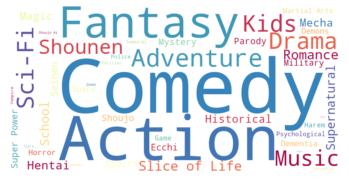

In [ ]:
#Cloud Genre Anime

from collections import defaultdict
from wordcloud import WordCloud

all_genres = defaultdict(int)

for genres in df['Genres']:
  for genre in genres.split(','):
    all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("cloud.png", format="png")
plt.show()